<a href="https://colab.research.google.com/github/wes-curl/lab-1-phase-2-wes-curl/blob/main/DATA_301_Lab_1B_Wesley_Curl_and_Andrew_Lobsang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore the In Class Survey

During the first class, you filled out the [first-day survey](https://docs.google.com/forms/d/e/1FAIpQLSczqKwzkye0RP8byLMxzj1Br3kC_YUdVGLWmMXX6VND99ivWg/viewform). In this lab, you will explore [the responses](https://docs.google.com/spreadsheets/d/1K9rfAscLESbwvovOc1aD3K6PFgdqkVRbaFHeD-UMTSc/edit?usp=sharing).

Download the spreadsheet from the link above, then read the data into a `pandas` `DataFrame` whose columns are the survey questions. Each row represents one student's response to the questions.

## Question 1

Make a graphic that visualizes the favorite colors of students in DATA 301. Explain what you see.

(_Hint:_ You might have to clean the data a bit first.)

Saving responses.csv to responses.csv


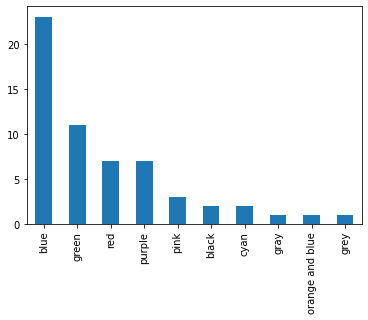

In [ ]:
import pandas as pd
# got this trick from https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
from google.colab import files
files = files.upload()
# (endquote) -> note! upload responses.csv from your computer for this to work! This only needs to be done once!
# I also realize after using this trick that files can be directly uploaded via the UI. Still, better to show how I got here.

def cleaner(string):
  return string.lower()

df_survey_responses = pd.read_csv("responses.csv")
df_survey_responses["What is your favorite color?"] = df_survey_responses["What is your favorite color?"].map(cleaner)
df_survey_responses["What is your favorite color?"].value_counts().plot.bar()

Facinatingly, the data seems to follow a predictable pattern. Blue is the most popular, at 17 favorites, then green at 9, red and purple at 6, pink at three, and so on. *Each value is roughly half of the previous, rounding up!* It feels like this must have some cause, but I can't figure out what. I mapped it to the electromagnetic spectrum, but there was no clear patter there, either. Maybe the sample size is too small, or maybe the data isn't precise enough. Anyway, this is really cool :)

## Question 2

Is there a relationship between the number of siblings a student has, and whether or not they live in SLO?

Make a visualization to address this question, and discuss the result.

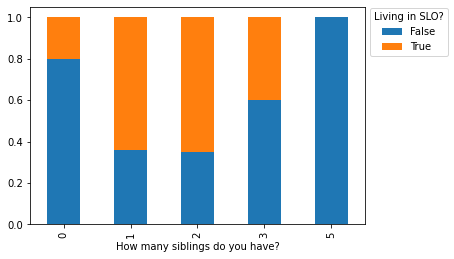

In [ ]:
def in_slo(location):
  if(location == "Off Campus, but in SLO"):
    return True
  if(location == "Off Campus, outside of SLO"):
    return False
  if(location == "On-Campus housing"):
    return True

df_survey_responses["in_slo"] = df_survey_responses["Where are you living this quarter?"].map(in_slo)
joint_siblings_SLO = pd.crosstab(df_survey_responses["How many siblings do you have?"], df_survey_responses["in_slo"])
number_of_students_per_sibling_class = joint_siblings_SLO.sum(1)
cond_siblings_SLO = joint_siblings_SLO.divide(number_of_students_per_sibling_class, 0)
plot = cond_siblings_SLO.plot.bar(stacked=True)
plot.legend(title="Living in SLO?", bbox_to_anchor=(1,1.02))

Yes! Students with no siblings (though the sample size is tiny) seem to live mostly out of SLO. However, for one sibling onwards, the more siblings a student has, the less likely they are to live in SLO.

## Question 3

You were asked to guess how many golf balls fit into a standard-sized school bus.  This is actually a famous Google interview question!  The best answer I could find online is [here](https://www.quora.com/How-many-golf-balls-can-fit-into-a-school-bus).

How did the different subgroups in the class do on this question?  That is, can you find an interesting relationship between the golf ball numbers guess and any of the other variables in this dataset?

(_Hint:_ There are many reasonable approaches to this problem. You will get full credit for any reasonable approach, as long as you carefully justify it.)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


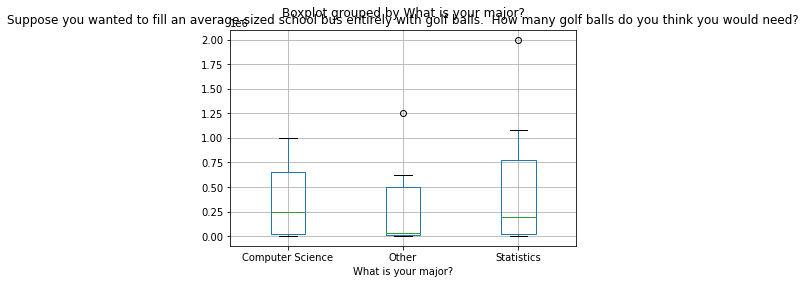

In [ ]:
# a calculation here: (https://www.theatlantic.com/technology/archive/2010/11/how-many-golf-balls-can-fit-in-a-school-bus/339663/) says that 500000 golf balls can fit in a school bus
def error(i):
  return abs(i - 500000)

golf_index = "Suppose you wanted to fill an average-sized school bus entirely with golf balls.  How many golf balls do you think you would need?"
df_survey_responses["error"] = df_survey_responses[golf_index].map(error)

net_error_by_major = df_survey_responses.groupby("What is your major?")["error"].apply(sum)
students_per_major = df_survey_responses["What is your major?"].value_counts()
students_per_major
net_error_by_major 
net_error_by_major_per_student = net_error_by_major.divide(students_per_major)

net_error_by_major_per_student
# we took off the major outliers so make the data more readable in the plot
plot = df_survey_responses.loc[df_survey_responses[golf_index] < 2500000].boxplot(column=golf_index, by="What is your major?")


First, I hypothesized that major could be an accurate predictor of the error a student has from the real number of golf balls. I assumed that a statistician was most likely to have the math experience to solve the problem, and would be trailed closely by a CS student. I had no hope for the "Other" category.

I found the net error by each category, then divided by the students in that category to get each category's average error.

The CS students dissapointed me, at four times the average error of the statisticians (1.303036e+06 on average), the "Other" category did remarkably well, a little shy of twice the error of the statisticians (7.361174e+05), and the statisticians did well at only 4.482615e+05 in average error.

## Question 4

Write and answer your own question using this data set.

Are sports fans less likely to also consider themselves artistic (and vice versa)? Write your answers in probability notation.

In [ ]:
joint_art_sports = pd.crosstab(df_survey_responses["Do you consider yourself a sports fan?"], df_survey_responses["Do you consider yourself artistic?"])
number_of_sports_fans = joint_art_sports.sum(1)
cond_art_sports = joint_art_sports.divide(number_of_sports_fans, 0);
cond_art_sports

number_of_artists = joint_art_sports.sum(0)
cond_sports_art = joint_art_sports.divide(number_of_artists, 1);
cond_sports_art

Do you consider yourself artistic?,No,Yes
Do you consider yourself a sports fan?,,
No,0.485714,0.608696
Yes,0.514286,0.391304


Yes! One third of sports fans also consider themselves artistic, as opposed to 45% of non-sports fans. In addition, 39% of people who consider themselves artistic also say that they are sports fans, as opposed to 51% of people who say they are not artistic. 

P(art|sports): 33%
P(sports|art): 39%
